# Steps of the Notebook
<a id="toc"></a>
- [1. Import Libraries](#1)
- [2. Provide the data path and class names](#2)
- [3. Adjust Diminsions of the Images](#3)
- [4. Initiliaze Training dataset](#4)
- [5. Initiliaze Testing dataset](#5)
- [6. Adjust Early Stop](#6)
- [7. Adjust ANN and it's Parameters](#7)
    - [7.1 Plot Loss Curve ANN](#7.1)
    - [7.2 Plot Accuarcy Curve ANN](#7.2)
- [8. Adjust CNN and it's Parameters](#8)
    - [8.1 Plot Loss Curve CNN](#8.1)
    - [8.2 Plot Accuarcy Curve CNN](#8.2)

<a id='1'></a>
# Import Libraries

In [23]:
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

<a id='2'></a>
# Provide the data path and class names

In [13]:
data_path = 'Data'
CLASS_NAMES = ['AMERICAN GOLDFINCH', 'BARN OWL', 'CARMINE BEE-EATER', 'DOWNY WOODPECKER', 'EMPEROR PENGUIN', 'FLAMINGO']

<a id='3'></a>
# Adjust the diminsions of the images

In [30]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNEL=3

<a id='4'></a>
# Initiliaze Training dataset

In [15]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    labels = 'inferred',
    label_mode = 'categorical', # int, # binary
    class_names = CLASS_NAMES,
    color_mode = 'rgb', #grayscale
    image_size = IMAGE_SIZE,
    shuffle=True,
    seed = 123,
    validation_split = 0.3,
    subset='training'
)

Found 811 files belonging to 6 classes.
Using 568 files for training.


<a id='5'></a>
# Initilaize Validation Data

In [16]:
ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = CLASS_NAMES,
    color_mode = 'rgb', 
    image_size = IMAGE_SIZE,
    shuffle=True,
    seed = 123,
    validation_split = 0.3,
    subset='validation'
)

Found 811 files belonging to 6 classes.
Using 243 files for validation.


<a id='6'></a>
# Adjust Early Stop

In [17]:
early_stopping = callbacks.EarlyStopping(
        patience=10,
        min_delta=0,
        monitor='val_loss',
        restore_best_weights=True,
        verbose=0,
        mode='min', 
        baseline=None,
    )
plateau = callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.2, 
            patience=4, 
            verbose=0,
            mode='min')

<a id='7'></a>
# Adjust ANN and it's Parameters

In [18]:
hidden_layer1 = 512
hidden_layer2 = 256
hidden_layer3 = 128
hidden_layers_activation = 'relu'
output_layer_activation = 'softmax'

LEARNING_RATE = 0.0005
loss_function = 'categorical_crossentropy'
ANN_epochs = 1000
batch_size = 10

ANN_model_checkpoint = callbacks.ModelCheckpoint('ANN_best_model.h5', monitor='val_loss', mode='min', patience = 10 ,save_best_only=True)


In [19]:
def load_model(): 
    ann_model = Sequential([
        Flatten(input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)),
        Dense(hidden_layer1, activation =hidden_layers_activation),
        Dense(hidden_layer2, activation =hidden_layers_activation),
        Dense(hidden_layer3, activation =hidden_layers_activation),
        Dense(len(CLASS_NAMES), activation=output_layer_activation),
    ])
    ann_model.compile(
        optimizer= Adam(learning_rate=LEARNING_RATE),
        loss=loss_function,
        metrics=['acc'],
    )
    return ann_model

ann_model = load_model()
history_ann = ann_model.fit(  ds_train,
                validation_data = (ds_validation),
                epochs = ANN_epochs,
                callbacks = [early_stopping , plateau, ANN_model_checkpoint],
              )

Epoch 1/1000
18/18 [==============================] - 5s 261ms/step - loss: 2424.0188 - acc: 0.1831 - val_loss: 1297.2738 - val_acc: 0.2099 - lr: 5.0000e-04
Epoch 2/1000
18/18 [==============================] - 4s 238ms/step - loss: 759.7687 - acc: 0.2817 - val_loss: 536.9564 - val_acc: 0.1893 - lr: 5.0000e-04
Epoch 3/1000
18/18 [==============================] - 4s 240ms/step - loss: 198.4000 - acc: 0.4982 - val_loss: 138.8608 - val_acc: 0.4938 - lr: 5.0000e-04
Epoch 4/1000
18/18 [==============================] - 2s 89ms/step - loss: 144.3565 - acc: 0.5651 - val_loss: 153.4778 - val_acc: 0.5391 - lr: 5.0000e-04
Epoch 5/1000
18/18 [==============================] - 2s 90ms/step - loss: 179.5122 - acc: 0.5246 - val_loss: 144.7404 - val_acc: 0.4774 - lr: 5.0000e-04
Epoch 6/1000
18/18 [==============================] - 2s 89ms/step - loss: 174.4824 - acc: 0.5194 - val_loss: 181.6382 - val_acc: 0.4362 - lr: 5.0000e-04
Epoch 7/1000
18/18 [==============================] - 2s 89ms/step - lo

In [20]:
ann_model.evaluate(ds_validation)

8/8 [==============================] - 0s 16ms/step - loss: 37.6835 - acc: 0.7243


[37.68349838256836, 0.7242798209190369]

<a id='7.1'></a>
## ANN Loss Curve

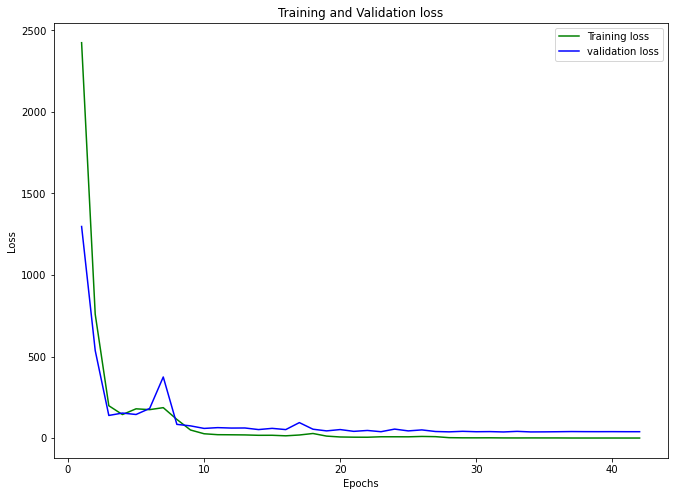

In [24]:
plt.figure(figsize=(11,8))
loss_train = history_ann.history['loss']
loss_val = history_ann.history['val_loss']
epochs = range(1,len(loss_train) + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## ANN Accuary Curve

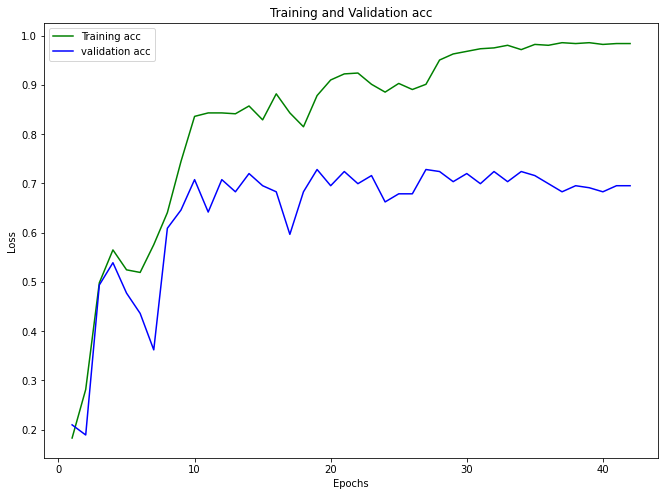

In [25]:
plt.figure(figsize=(11,8))
val_train = history_ann.history['acc']
val_acc = history_ann.history['val_acc']
epochs = range(1,len(val_acc)+1)
plt.plot(epochs, val_train, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<a id='8'></a>
# Adjust CNN and it's Parameters

In [26]:
filters1 = 8
filters2 = 16
filters3 = 32

kernel_size = (3,3)
conv_activation = 'relu'

pool_size1 = (5,5)
pool_size2 = (3,3)
pool_size3 = (2,2)

hidden_layer1 = 128
hidden_layer2 = 64
hidden_layer3 = 32

hidden_layer_activation = 'relu'
output_layer_activation = 'softmax'

LEARNING_RATE = 0.0005
loss_function = 'categorical_crossentropy'
CNN_epochs = 1000
batch_size = 15

CNN_model_checkpoint = callbacks.ModelCheckpoint('CNN_best_model.h5', monitor='val_loss', mode='min', patience = 10 ,save_best_only=True)

In [34]:
def load_model():
    cnn_model = Sequential([
        Conv2D(filters1, kernel_size = kernel_size,input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNEL), activation=conv_activation),
        MaxPooling2D(pool_size=pool_size2),
        Conv2D(filters2, kernel_size = kernel_size, activation=conv_activation),
        MaxPooling2D(pool_size=pool_size3),
        Conv2D(filters3, kernel_size = kernel_size, activation= conv_activation),
        MaxPooling2D(pool_size=pool_size3),
        
        Flatten(),
        
        Dense(hidden_layer1, activation =hidden_layer_activation),
        Dense(hidden_layer2, activation =hidden_layer_activation),
        Dense(len(CLASS_NAMES), activation=output_layer_activation)    
    ])
    cnn_model.compile(
        Adam(learning_rate=LEARNING_RATE),
        loss = loss_function,
        metrics = ['acc']
    )
    return cnn_model



cnn_model = load_model()
history_cnn = cnn_model.fit(  ds_train,
                validation_data = (ds_validation),
                epochs = CNN_epochs,
                callbacks = [early_stopping , plateau, CNN_model_checkpoint],
              )


Epoch 1/1000
18/18 [==============================] - 2s 77ms/step - loss: 5.5340 - acc: 0.3310 - val_loss: 1.4915 - val_acc: 0.5062 - lr: 5.0000e-04
Epoch 2/1000
18/18 [==============================] - 1s 69ms/step - loss: 0.9831 - acc: 0.6408 - val_loss: 1.1308 - val_acc: 0.5679 - lr: 5.0000e-04
Epoch 3/1000
18/18 [==============================] - 1s 74ms/step - loss: 0.5662 - acc: 0.7958 - val_loss: 0.8929 - val_acc: 0.6996 - lr: 5.0000e-04
Epoch 4/1000
18/18 [==============================] - 1s 74ms/step - loss: 0.3034 - acc: 0.9067 - val_loss: 0.7711 - val_acc: 0.7449 - lr: 5.0000e-04
Epoch 5/1000
18/18 [==============================] - 1s 74ms/step - loss: 0.1648 - acc: 0.9507 - val_loss: 0.7760 - val_acc: 0.7449 - lr: 5.0000e-04
Epoch 6/1000
18/18 [==============================] - 1s 74ms/step - loss: 0.0889 - acc: 0.9754 - val_loss: 0.6673 - val_acc: 0.7860 - lr: 5.0000e-04
Epoch 7/1000
18/18 [==============================] - 1s 73ms/step - loss: 0.0418 - acc: 1.0000 - va

In [37]:
cnn_model.evaluate(ds_validation)

8/8 [==============================] - 0s 18ms/step - loss: 0.6673 - acc: 0.7860


[0.6672576069831848, 0.7860082387924194]

<a id='8.1'></a>
## CNN Lose Curve

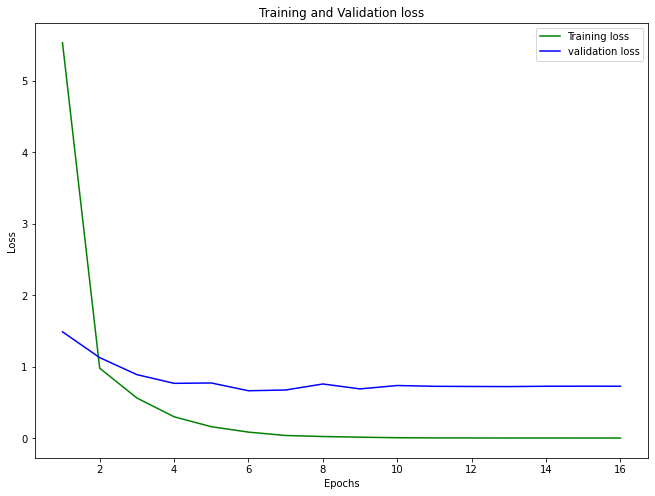

In [35]:
plt.figure(figsize=(11,8))
loss_train = history_cnn.history['loss']
loss_val = history_cnn.history['val_loss']
epochs = range(1,len(loss_train) + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<a id='8.2'></a>
## CNN Accuarcy Curve

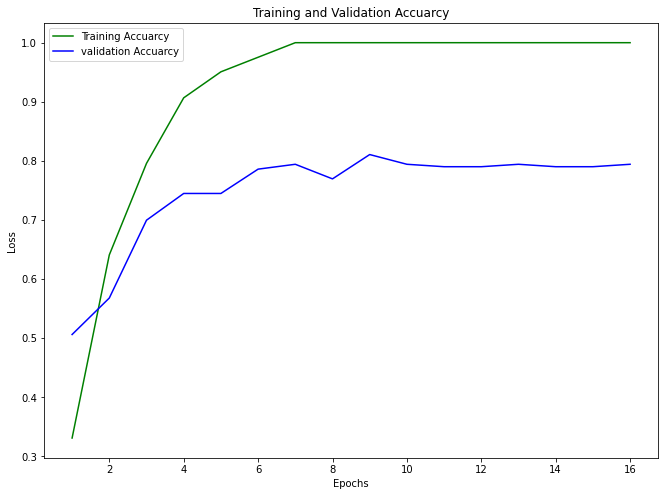

In [36]:
plt.figure(figsize=(11,8))
acc_train = history_cnn.history['acc']
acc_val = history_cnn.history['val_acc']
epochs = range(1,len(acc_train) + 1)
plt.plot(epochs, acc_train, 'g', label='Training Accuarcy')
plt.plot(epochs, acc_val, 'b', label='validation Accuarcy')
plt.title('Training and Validation Accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()